In [36]:
import librosa
import numpy as np
import pandas as pd
from sklearn import svm
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import csv


In [37]:
def extract_mfcc(audio_file):
    y,sr = librosa.load(audio_file)
    mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr).T, axis=0)
    np.set_printoptions(linewidth=500)
    return mfccs
def extract_cont(audio_file):
    y,sr = librosa.load(audio_file)
    cont = np.mean(librosa.feature.spectral_contrast(y=y).T)
    return cont
def extract_rolloff(audio_file):
    y,sr = librosa.load(audio_file)
    rollo = np.mean(librosa.feature.spectral_rolloff(y=y,sr=sr).T)
    return rollo
def extract_zcr1(audio_file):
    y,sr = librosa.load(audio_file)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T)
    return zcr
def extract_centr2(audio_file):
    y,sr = librosa.load(audio_file)
    centr = np.mean(librosa.feature.spectral_centroid(y=y,sr=sr).T)
    return centr
def extract_bandw2(audio_file):
    y,sr = librosa.load(audio_file)
    bandw = np.mean(librosa.feature.spectral_bandwidth(y=y,sr=sr).T)
    return bandw
def extract_ccens(audio_file):
    y,sr = librosa.load(audio_file)
    ccens = np.mean(librosa.feature.chroma_cens(y=y).T)
    return ccens
def extract_ccqt(audio_file):
    y,sr = librosa.load(audio_file)
    ccqt = np.mean(librosa.feature.chroma_cqt(y=y,sr=sr).T)
    return ccqt 
def extract_cstft(audio_file):
    y,sr = librosa.load(audio_file)
    cstft = np.mean(librosa.feature.chroma_stft(y=y).T)
    return cstft
def extract_cvqt(audio_file):
    y,sr = librosa.load(audio_file)
    cvqt = np.mean(librosa.feature.chroma_vqt(y=y,sr=sr,intervals='ji5').T)
    return cvqt

In [38]:
print(extract_zcr1('real.wav'))
print(extract_centr2('real.wav'))
print(extract_bandw2('real.wav'))
print(extract_cont('real.wav'))
print(extract_rolloff('real.wav'))
print(extract_ccens('real.wav'))
print(extract_ccqt('real.wav'))
print(extract_cstft('real.wav'))
print(extract_cvqt('real.wav'))

0.09047234195402298
1703.1356858780546
1551.561531638598
27.321905607808862
3296.0651266163795
0.20515454
0.27847922
0.31155875
0.34316364


c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=690
  warnings.warn(


In [51]:
csv_file_training = 'trainingfornorm.csv'
csv_file_validation = 'valideverything.csv'
dataf = []
headerList = []
for i in range(20):
    headerList.append("mfcc"+str(i+1))
headerList.append("zcr")
headerList.append("centr")
headerList.append("bandw")
headerList.append("contrast")
headerList.append("rolloff")
headerList.append("ccens")
#headerList.append("ccqt")
headerList.append("cstft")
headerList.append("cvqt")
headerList.append("audio_type")
DIR = 'archive/for-rerec/for-rerecorded/training/fake/'

l = []
for f in tqdm(os.listdir(DIR)):
    for n in extract_mfcc(DIR+ f):
        l.append(n)
    l.append(extract_zcr1(DIR+ f))
    l.append(extract_centr2(DIR+ f))
    l.append(extract_bandw2(DIR+ f))
    l.append(extract_cont(DIR+ f))
    l.append(extract_rolloff(DIR+ f))
    #l.append(extract_ccens(DIR+ f))
    l.append(extract_ccqt(DIR+ f))
    l.append(extract_cstft(DIR+ f))
    l.append(extract_cvqt(DIR+ f))
    l.append("fake")
    dataf.append(l)
    l = []
DIR2 = 'archive/for-rerec/for-rerecorded/training/real/'
for f in tqdm(os.listdir(DIR2)):
    for n in extract_mfcc(DIR2+ f):
        l.append(n)
    l.append(extract_zcr1(DIR2+ f))
    l.append(extract_centr2(DIR2+ f))
    l.append(extract_bandw2(DIR2+ f))
    l.append(extract_cont(DIR2+ f))
    l.append(extract_rolloff(DIR2+ f))
    l.append(extract_ccens(DIR2+ f))
    #l.append(extract_ccqt(DIR2+ f))
    #l.append(extract_cstft(DIR2+ f))
    #l.append(extract_cvqt(DIR2+ f))
    #l.append("real")
    dataf.append(l)
    l = []

with open(csv_file_training, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)

  6%|▌         | 309/5104 [00:33<08:41,  9.19it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=660
  warnings.warn(
  6%|▌         | 312/5104 [00:34<08:41,  9.18it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=537
  warnings.warn(
  6%|▋         | 319/5104 [00:34<08:42,  9.16it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=651
  warnings.warn(
  6%|▋         | 323/5104 [00:35<08:40,  9.19it/s]c:\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=763
  warnings.warn(
  7%|▋         | 339/5104 [00:37<08:43,  9.11it/s]


KeyboardInterrupt: 

In [31]:
hdl = headerList[0:(len(headerList)-1)]
train_data = pd.read_csv("trainingrerec.csv")
x = train_data[hdl].values
y = train_data['audio_type'].values
le = LabelEncoder()
y = le.fit_transform(y)
x = StandardScaler().fit_transform(x)
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [33]:
ypred = svc.predict(X_test)
print(ypred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, ypred)))

[1 0 0 ... 0 1 1]
Model accuracy score with default hyperparameters: 0.9824


In [34]:
cm = confusion_matrix(y_test,ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 987    7]
 [  29 1019]]

True Positives(TP) =  987

True Negatives(TN) =  1019

False Positives(FP) =  7

False Negatives(FN) =  29


<Axes: >

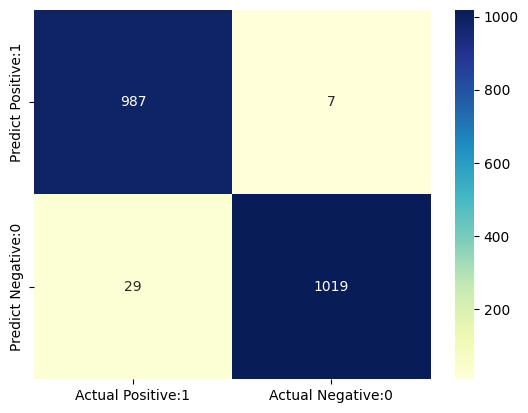

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'],)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [52]:
csv_file_training = 'trainingforrerec2.csv'
csv_file_validation = 'valideverything.csv'
dataf = []
headerList = []
for i in range(20):
    headerList.append("mfcc"+str(i+1))
headerList.append("zcr")
headerList.append("centr")
headerList.append("bandw")
headerList.append("contrast")
headerList.append("rolloff")
headerList.append("audio_type")
DIR = 'archive/for-rerec/for-rerecorded/training/fake/'

l = []
for f in tqdm(os.listdir(DIR)):
    for n in extract_mfcc(DIR+ f):
        l.append(n)
    l.append(extract_zcr1(DIR+ f))
    l.append(extract_centr2(DIR+ f))
    l.append(extract_bandw2(DIR+ f))
    l.append(extract_cont(DIR+ f))
    l.append(extract_rolloff(DIR+ f))
    l.append("fake")
    dataf.append(l)
    l = []
DIR2 = 'archive/for-rerec/for-rerecorded/training/real/'
for f in tqdm(os.listdir(DIR2)):
    for n in extract_mfcc(DIR2+ f):
        l.append(n)
    l.append(extract_zcr1(DIR2+ f))
    l.append(extract_centr2(DIR2+ f))
    l.append(extract_bandw2(DIR2+ f))
    l.append(extract_cont(DIR2+ f))
    l.append(extract_rolloff(DIR2+ f))
    l.append("real")
    dataf.append(l)
    l = []

with open(csv_file_training, mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headerList)
    writer.writerows(dataf)

100%|██████████| 5104/5104 [01:34<00:00, 54.25it/s]


In [53]:
hdl = headerList[0:(len(headerList)-1)]
train_data = pd.read_csv("trainingrerec.csv")
x = train_data[hdl].values
y = train_data['audio_type'].values
le = LabelEncoder()
y = le.fit_transform(y)
x = StandardScaler().fit_transform(x)
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
svc = SVC()
svc.fit(X_train,y_train)

SVC()

[1 0 0 ... 0 1 1]
Model accuracy score with default hyperparameters: 0.9809
Confusion matrix

 [[ 986    8]
 [  31 1017]]

True Positives(TP) =  986

True Negatives(TN) =  1017

False Positives(FP) =  8

False Negatives(FN) =  31


<Axes: >

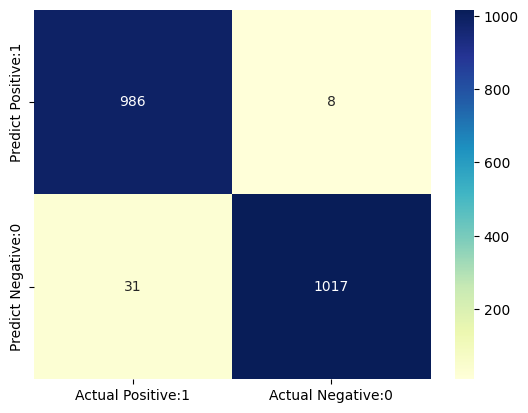

In [54]:
ypred = svc.predict(X_test)
print(ypred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, ypred)))
cm = confusion_matrix(y_test,ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'],)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')